In [1]:
# Importing all the relevant libraries for this project.

import numpy as np
import pandas as pd
import seaborn as sns

### Importing the Dataset

The original CSV file does not include any kind of column names, so if we don't define them, the first observation will be taken as the column names. We use the information provided to create the names of the features, and we will use one-word names for each of them for easy access.

In [2]:
columns = ['CustID', 'Accept1', 'Reward', 'Mailer', 'Income1', 'Accounts', 'Protection', 'Rating1', 'Cards', 'Homes', 'HHSize', 'HomeOwner', 'AvgBal', 'BalQ1', 'BalQ2', 'BalQ3', 'BalQ4']
data = pd.read_csv('creditcardmarketing.csv', names=columns)

### Dataset

The data set consists of information on 18,000 current bank customers in the study. These are the definitions of data points provided:

* CustID: A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
* Accept: Did the customer accept (Yes) or reject (No) the offer. 
* Reward: The type of reward program offered for the card.
* Mailer: Letter or postcard.
* Income: Low, Medium or High.
* Accounts: How many non-credit-card accounts are held by the customer.
* Protection: Does the customer have overdraft protection on their checking account(s) (Yes or No).
* Rating: Credit Rating - Low, Medium or High.
* Cards: The number of credit cards held at the bank.
* Homes: The number of homes owned by the customer.
* HHSize: Number of individuals in the family.
* HomeOwner: Does the customer own their home? (Yes or No).
* BalQX: Average account balance (across all accounts over time) for Q1, Q2, Q3 and Q4.
* AvgBal: Average balance for each quarter in the last year.

In [3]:
data.head()

,CustID,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


### Exporting the dataset to work with in Tableau.

We define here the 4 categories or bins for the analysis in Tableau. We are not going to use them here, but as in Tableau binning has its limitations (all bins have to be the same size there), we decide to create them here. We are going to take the values of the Quartiles and create 4 bins with 25% of the observations in each bin. This will come in handy in the future, when we have to analyze some of the features of the data in Tableau using this bins based on the average balance.

In [4]:
data.describe()

,CustID,Accounts,Cards,Homes,HHSize,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [5]:
data['AvgBalCat'] = np.where(data['AvgBal'] < 787.5, 'A', np.where(data['AvgBal'] < 1007, 'B', np.where(data['AvgBal'] < 1153.25, 'C', 'D')))
data

,CustID,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4,AvgBalCat
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,D
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,A
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,A
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,D
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0,A
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0,B
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0,C
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0,C


In [6]:
data.to_csv('Data2.csv', index = False)

### Resetting Index, Dropping columns and NA values

First, we check for NA values, and as we see there are not many of them, we decide to drop them from the dataset, as they represent around 0.15% of all the observations, which is not a big deal.
After that, we reset the index to avoid having gaps after dropping some observations.
Finally, we will drop the CustID variable which we are not going to use, and as we are resetting the index, we will drop the older one. 

In [7]:
data.dropna(0, 'any', inplace = True)

In [8]:
data.reset_index(inplace = True)

In [9]:
data.drop(['CustID', 'index'], axis = 1, inplace = True)

Our dataset will contain a total of 17976 observations and 16 features apart from our label.
We will discuss whether all the features are going to be relevant for our model or not.
We have seen in Tableau that many of the features do not offer a big variance within categories: this probably means that these are not statistically significant, wven though we are gonna have to check that through our models. 

The dangerous part of including irrelevant regressors is that we are including more elements that lead to multicollinearity and we are reducing the accuracy of the model by creating many more relationships within regressors that may hinder the true relationships between each regressor and the label.
So, keeping that in mind, we will surely use a model with the regressors that are apparently more significant, and drop some of the variables later on.

In [10]:
data

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4,AvgBalCat
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,D
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,A
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,A
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,D
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0,A
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0,B
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0,C
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0,C


We now want to check the value counts for each of the categories. We can see one of the biggest problem this dataset will provide is the big imbalance in the binary label: there are 17 times more Nos than Yeses. This is going to be a problem we are going to have to deal with, as with 94% of observations being labelled as No, any unskilled model would be able to achieve an accuracy of 94% by just uniformly guessing all the observations to be No regardless of the values of the regressors for it.

This is letting us see a bigger problem: we cannot just take accuracy as a method to evaluate the model, as the minimum accuracy that would be acceptable would be a 94% level, and that would mislead us into believing we have achieved a good model, but we won't have. For this reason, we are going to have to use other evaluation methods that can truly represent the accuracy of this model in such an imbalanced scenario.

In [11]:
data['Accept1'].value_counts()

No     16955
Yes     1021
Name: Accept1, dtype: int64

In [12]:
data['Reward'].value_counts()

Air Miles    6047
Cash Back    5995
Points       5934
Name: Reward, dtype: int64

In [13]:
data['Mailer'].value_counts()

Postcard    9134
Letter      8842
Name: Mailer, dtype: int64

In [14]:
data['Income1'].value_counts()

Medium    9002
High      4519
Low       4455
Name: Income1, dtype: int64

In [15]:
data['Accounts'].value_counts()

1    13674
2     4007
3      295
Name: Accounts, dtype: int64

In [16]:
data['Protection'].value_counts()

No     15300
Yes     2676
Name: Protection, dtype: int64

In [17]:
data['Rating1'].value_counts()

High      6064
Medium    5964
Low       5948
Name: Rating1, dtype: int64

In [18]:
data['Cards'].value_counts()

2    7933
1    6147
3    3381
4     515
Name: Cards, dtype: int64

In [19]:
data['Homes'].value_counts()

1    14502
2     3289
3      185
Name: Homes, dtype: int64

In [20]:
data['HomeOwner'].value_counts()

Yes    11636
No      6340
Name: HomeOwner, dtype: int64

In [21]:
data['HHSize'].value_counts()

3    5705
4    5532
5    2851
2    2809
1     539
6     538
9       1
8       1
Name: HHSize, dtype: int64

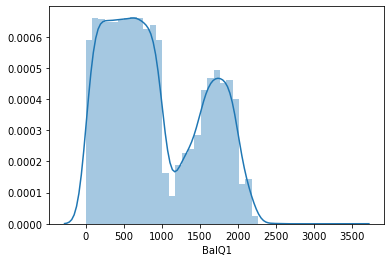

In [22]:
sns.distplot(data['BalQ1'])

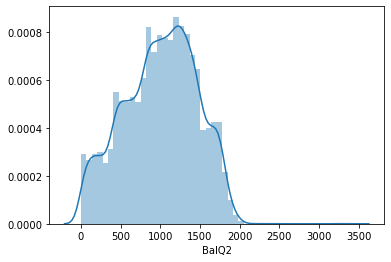

In [23]:
sns.distplot(data['BalQ2'])

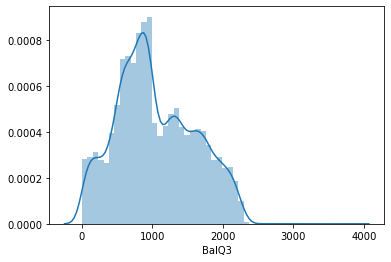

In [24]:
sns.distplot(data['BalQ3'])

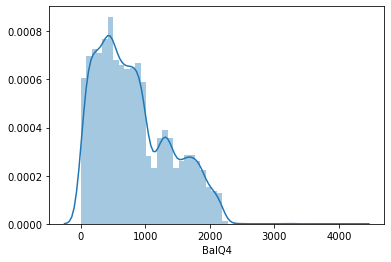

In [25]:
sns.distplot(data['BalQ4'])

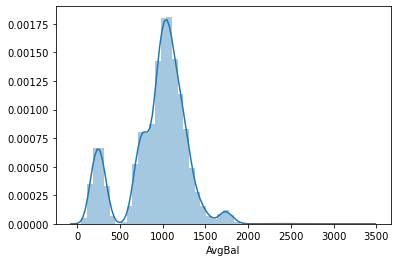

In [26]:
sns.distplot(data['AvgBal'])

In [27]:
data.dtypes

Accept1        object
Reward         object
Mailer         object
Income1        object
Accounts        int64
Protection     object
Rating1        object
Cards           int64
Homes           int64
HHSize          int64
HomeOwner      object
AvgBal        float64
BalQ1         float64
BalQ2         float64
BalQ3         float64
BalQ4         float64
AvgBalCat      object
dtype: object

### Numerical Variables
We are now going to take a look at the numerical variables in the dataset. It is important to note that all 5 of them represent the same, the balance of the individual at a point in time. This means that, mostly, all variables provide the same sort of information, so it is likely they have a somehow large correlation between them and that all of them are not going to be useful in our model.

In [28]:
datanum = data.select_dtypes(include=np.float)

In [29]:
datanum

,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...
17971,167.50,136.0,65.0,71.0,398.0
17972,850.50,984.0,940.0,943.0,535.0
17973,1087.25,918.0,767.0,1170.0,1494.0
17974,1022.25,626.0,983.0,865.0,1615.0


In [30]:
datanum.corr()

,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4
AvgBal,1.000000,0.481507,0.800285,0.752741,0.572380
BalQ1,0.481507,1.000000,0.483134,-0.060961,-0.237283
BalQ2,0.800285,0.483134,1.000000,0.487710,0.168955
BalQ3,0.752741,-0.060961,0.487710,1.000000,0.565298
BalQ4,0.572380,-0.237283,0.168955,0.565298,1.000000


In the correlation table above, we can see that the AvgBal is correlated with all of the quarter-balances, and moreover, it is highly correlated with Q2 and Q3. If we think intuitively about the meaning of these variables and how they should affect the decision to accept or not a credit card offer, it seems logical to think that how big your balance is in your account on average, throughout the whole year, would make more sense than thinking whether your balance is high in a particular point of the year.

Because of that, I feel that AvgBal is a good variable for the regression that contains information of all other 4 variables, and it would be more useful to take that one, rather than any of the other variables, if we had to choose one of them.

### Categorical Variables
We are now gonna take a look at the categorical variables, which are most of the regressors we have. We have to be aware that the machine is not going to take strings as values that can be analysed, so we are going to have to label the categories differently for the model to work properly and make use of as much of the information we have as possible. 

We have to distinguish two types of categories, which mean we are gonna have to take care of them in different ways. Firstly, we have the categories which have an order. For example, we can see that Rating or Income are split into 'High', 'Medium' and 'Low'. In this case we are interested in preserving the order, as we know that 'High' is in its dimension bigger than 'Medium', which in turn is bigger than 'Low'. This means, that we can label them as 3, 2, 1, and the machine will preserve the ordinality this variables provide.

On the other hand, we have other categories such as Reward or Mailer that may or may not be binary (either of 2 options), but they also have no order: we cannot say, in the case of the Rewards, that 'Air Miles' are better than 'Points' or 'Cash Back'. In this case, we should not create an ordinal variable, but we should create a set of dummies that allows us to identify which reward did each individual take, and not assign them any kind of value or ordering.

Finally, we have to think about the other binary variables, which are basically the ones whose values are Yes/No. In this case, we are just defining a new variable that takes 1 when the observation is Yes and 0 when No.

In [31]:
datacat = data.select_dtypes(include=[np.int, np.object])

In [32]:
datacat

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBalCat
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,D
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,A
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,A
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,D
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,D
...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,A
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,B
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,C
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,C


### Creating new dummies
As we specified in our analysis in Tableau, there are some variables that may not be entirely useful for our analysis, but there could be some features that we may want to point out that could potentially make a difference in the model. For example, take HHSize. We can see that there is a very different ratio of Yes/No when HHSize is 1 than when it is not. It looks like there is not much of a difference when HHSize is either 2, 3, 4, 5, 6 or more, but there is a difference that looks significant when the variable has a value of 1. In this particular case, we can argue that this is a fact we want to preserve in our model, so we will create a dummy variable 'LiveAlone' that takes the value 1 when HHSize is 1, and 0 otherwise.

In [33]:
data['LiveAlone'] = np.where(data['HHSize'] == 1, 1, 0)

Similarly, when we checked the distribution of AvgBal, we could see there was something like 2 normal distributions side by side, which could point at the data having 2 different clusters. Both of them joined at a value of 500 where the amount of observations was at its minimum. Then, the peak was achieved around the value of 1000, and then the observations decreased in a somewhat normal fashion. 

We don't know whether AvgBal as a continuous variable is going to provide us with very useful information, but something we can do is to create some dummies that represent the individuals whose average balance is consistently high or consistently low. We can do that in the following way:

In [34]:
data['LowBalance'] = np.where(data['AvgBal'] <= 500, 1, 0)
data['HighBalance'] = np.where(data['AvgBal'] >= 1000, 1, 0)

In [35]:
data

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,HomeOwner,AvgBal,BalQ1,BalQ2,BalQ3,BalQ4,AvgBalCat,LiveAlone,LowBalance,HighBalance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,D,0,0,1
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,A,0,1,0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,A,0,1,0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,D,0,0,1
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,D,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0,A,0,1,0
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0,B,0,0,0
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0,C,0,0,1
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0,C,0,0,1


In [36]:
data['LiveAlone'].value_counts()

0    17437
1      539
Name: LiveAlone, dtype: int64

In [37]:
data['LowBalance'].value_counts()

0    15445
1     2531
Name: LowBalance, dtype: int64

In [38]:
data['HighBalance'].value_counts()

1    9233
0    8743
Name: HighBalance, dtype: int64

### Label Encoding
Our next step is to encode the variables we have so that instead of strings, they are represented numerically. We are going to manually encode the labels as we are willing to preserve the ordinality in some of the cases.

In [39]:
data['Income'] = np.where(data['Income1'] == 'Low', 1, np.where(data['Income1'] == 'Medium', 2, 3))

In [40]:
data['Rating'] = np.where(data['Rating1'] == 'Low', 1, np.where(data['Rating1'] == 'Medium', 2, 3))

In [41]:
data['Accept'] = np.where(data['Accept1'] == 'Yes', 1, 0)

In [42]:
data['Letter'] = np.where(data['Mailer'] == 'Letter', 1, 0)

In [43]:
data['AirMiles'] = np.where(data['Reward'] == 'Air Miles', 1, 0)

In [44]:
data['Points'] = np.where(data['Reward'] == 'Points', 1, 0)

In [45]:
data['HomeOwner'] = np.where(data['HomeOwner'] == 'Yes', 1, 0)

In [46]:
data

,Accept1,Reward,Mailer,Income1,Accounts,Protection,Rating1,Cards,Homes,HHSize,...,AvgBalCat,LiveAlone,LowBalance,HighBalance,Income,Rating,Accept,Letter,AirMiles,Points
0,No,Air Miles,Letter,High,1,No,High,2,1,4,...,D,0,0,1,3,3,0,1,1,0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,...,A,0,1,0,2,2,0,1,1,0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,...,A,0,1,0,3,2,0,0,1,0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,...,D,0,0,1,2,3,0,1,1,0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,...,D,0,0,1,2,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,...,A,0,1,0,3,1,0,1,0,0
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,...,B,0,0,0,3,1,0,1,0,0
17973,No,Cash Back,Letter,High,1,No,Low,2,1,4,...,C,0,0,1,3,1,0,1,0,0
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,...,C,0,0,1,2,2,0,1,0,0


## Working Dataset
After all the transformations we have done, and the necessary pre-processing steps, we are now going to create a new, reduced dataset which will be the one we will be using for the models. We are going to take the variables that we believe are going to be most significant in the model, we are also going to include the encoded dummies we created and the interesting features that we extracted from some variables. 

We will also take a look at the formatting of the dataset. When we create a dataset and any of the variables is a float, the machine attributes all columns a float type. This fact is going to create an excess amount of memory used since each float point requires a bigger amount of memory to be used, and in the case where there are so many observations, it can be troublesome or slowing our processes down. For that reason, and because all our variables except for one are integers (the only float is AvgBal, and we are basically rounding it up to the nearest unit, which also doesn't involve any information loss), we are going to transform all our columns into the int type.

In the following command we are creating the two datasets we want to work with: one with all the variables, df1, and another one including only the variables we want to work with, df2.

Finally, we will use the log of the AvgBal instead of the absolute value. We are trying to reduce the distance between the values to make it easier to work with.

In [47]:
df1 = pd.DataFrame([data.Accept, data.Accounts, data.Cards, data.Homes, data.HomeOwner, data.AirMiles, data.Points, data.Letter, data.Income, data.Rating, data.LiveAlone, data.AvgBal, data.LowBalance, data.HighBalance]).transpose()


In [48]:
df2 = pd.DataFrame([data.Accept, data.AirMiles, data.Points, data.Letter, data.Income, data.Rating, data.LiveAlone, data.AvgBal, data.LowBalance, data.HighBalance]).transpose()


In [49]:
df1 = df1.astype(int)

In [50]:
df1

,Accept,Accounts,Cards,Homes,HomeOwner,AirMiles,Points,Letter,Income,Rating,LiveAlone,AvgBal,LowBalance,HighBalance
0,0,1,2,1,0,1,0,1,3,3,0,1160,0,1
1,0,1,2,2,1,1,0,1,2,2,0,147,1,0
2,0,2,2,1,1,1,0,0,3,2,0,276,1,0
3,0,2,1,1,0,1,0,1,2,3,0,1219,0,1
4,0,1,2,1,1,1,0,1,2,2,0,1211,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,1,1,1,1,0,0,1,3,1,0,167,1,0
17972,0,1,3,1,1,0,0,1,3,1,0,850,0,0
17973,0,1,2,1,0,0,0,1,3,1,0,1087,0,1
17974,0,1,4,2,1,0,0,1,2,2,0,1022,0,1


In [51]:
df2 = df2.astype(int)

In [52]:
df2.iloc[20:35, :]

,Accept,AirMiles,Points,Letter,Income,Rating,LiveAlone,AvgBal,LowBalance,HighBalance
20,0,0,1,0,1,3,0,1175,0,1
21,0,0,1,1,2,1,0,811,0,0
22,0,0,0,1,3,3,0,1754,0,1
23,0,1,0,0,3,3,0,689,0,0
24,0,0,0,1,1,1,0,1018,0,1
25,0,0,0,0,2,3,0,1130,0,1
26,0,1,0,0,1,1,1,877,0,0
27,1,1,0,1,2,1,0,769,0,0
28,0,0,0,0,2,1,0,709,0,0
29,0,0,1,0,3,2,1,690,0,0


In [53]:
df2.dtypes

Accept         int64
AirMiles       int64
Points         int64
Letter         int64
Income         int64
Rating         int64
LiveAlone      int64
AvgBal         int64
LowBalance     int64
HighBalance    int64
dtype: object

In [54]:
df1['AvgBal'] = np.log(data['AvgBal'])
df2['AvgBal'] = np.log(data['AvgBal'])

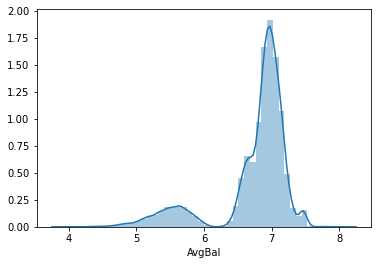

In [55]:
sns.distplot(df1['AvgBal'])

### Defining X as the matrix of features and y as the label.

In [56]:
y1 = df1.iloc[:, 0]
y2 = df2.iloc[:, 0]

In [57]:
X1 = df1.iloc[:, 1:]
X2 = df2.iloc[:, 1:]

In [58]:
y1

0        0
1        0
2        0
3        0
4        0
        ..
17971    0
17972    0
17973    0
17974    0
17975    0
Name: Accept, Length: 17976, dtype: int64

In [59]:
X1

,Accounts,Cards,Homes,HomeOwner,AirMiles,Points,Letter,Income,Rating,LiveAlone,AvgBal,LowBalance,HighBalance
0,1,2,1,0,1,0,1,3,3,0,7.056822,0,1
1,1,2,2,1,1,0,1,2,2,0,4.992132,1,0
2,2,2,1,1,1,0,0,3,2,0,5.622211,1,0
3,2,1,1,0,1,0,1,2,3,0,7.105786,0,1
4,1,2,1,1,1,0,1,2,2,0,7.099202,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,1,1,1,0,0,1,3,1,0,5.120983,1,0
17972,1,3,1,1,0,0,1,3,1,0,6.745824,0,0
17973,1,2,1,0,0,0,1,3,1,0,6.991407,0,1
17974,1,4,2,1,0,0,1,2,2,0,6.929761,0,1


In [60]:
y2

0        0
1        0
2        0
3        0
4        0
        ..
17971    0
17972    0
17973    0
17974    0
17975    0
Name: Accept, Length: 17976, dtype: int64

In [61]:
X2

,AirMiles,Points,Letter,Income,Rating,LiveAlone,AvgBal,LowBalance,HighBalance
0,1,0,1,3,3,0,7.056822,0,1
1,1,0,1,2,2,0,4.992132,1,0
2,1,0,0,3,2,0,5.622211,1,0
3,1,0,1,2,3,0,7.105786,0,1
4,1,0,1,2,2,0,7.099202,0,1
...,...,...,...,...,...,...,...,...,...
17971,0,0,1,3,1,0,5.120983,1,0
17972,0,0,1,3,1,0,6.745824,0,0
17973,0,0,1,3,1,0,6.991407,0,1
17974,0,0,1,2,2,0,6.929761,0,1


## Creating the model

### Treating the imbalanced data.
As we saw before, we have a severly imbalanced dataset. To try to obtain a valid model that helps us predict both labels correctly, we are going to have to undersample the Nos, so that both Yes and Nos have a similar weight in the model and it does not just decide to predict Nos for all observations. We need this step so as to make sure the model predicts the observations in accordance with the features provided, and not by default, like an unskilled model.

### Splitting the train and test sets.
We will have to use the train_test_split to get a desired split of our X matrix and y array so that the model can be trained and then tested. This step is necessary to test for the goodness of the model.

### Choosing and running the model. 
Next, we are going to have to choose which model do we want to run with our data. We will start with the Logistic Model, which is a linear model. Later, we will be performing some non-linear models such as the K-Nearest Neighbours, the Kernel Support Vector Machine or the Decision Tree. We will run each of the models with different sets of parameters and will see which of the models and which of the sets of parameters achieves a better score for our model.

In [62]:
# First, we import all the libraries we will be using.

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### 1. Logistic Regression

Now we are going to define a for loop that will create a number of models. They will all take the same dataset, but each model will take a different set of values for the sampling strategy in the undersampling process, and we will also take different values for the train and test split. 

In [63]:
# This is the model for the complete dataset, df1.

for sam in [1, 0.9, 0.8, 0.66, 0.5, 0.4, 0.33, 0.25, 0.2]:
    for test in [0.2, 0.25, 0.3]:
        undersample = RandomUnderSampler(sampling_strategy=sam)
        X_und, y_und = undersample.fit_resample(X1, y1)
        X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=test, random_state=42)
        classifier = LogisticRegression(solver='liblinear', class_weight='balanced')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        pre = classification_report(y_test, y_pred, output_dict=True)['1']['precision']*100
        acc = classification_report(y_test, y_pred, output_dict=True)['1']['recall']*100
        print(f'Log model with a {sam:.2f} ratio, test size of {test:.2f}: {acc:.2f}% of sensitivity and a {pre:.2f}% of precision.')

Log model with a 1.00 ratio, test size of 0.20: 74.50% of sensitivity and a 69.30% of precision.
Log model with a 1.00 ratio, test size of 0.25: 76.03% of sensitivity and a 64.79% of precision.
Log model with a 1.00 ratio, test size of 0.30: 74.83% of sensitivity and a 64.14% of precision.
Log model with a 0.90 ratio, test size of 0.20: 66.20% of sensitivity and a 67.46% of precision.
Log model with a 0.90 ratio, test size of 0.25: 69.26% of sensitivity and a 63.35% of precision.
Log model with a 0.90 ratio, test size of 0.30: 70.49% of sensitivity and a 67.40% of precision.
Log model with a 0.80 ratio, test size of 0.20: 74.75% of sensitivity and a 60.89% of precision.
Log model with a 0.80 ratio, test size of 0.25: 73.93% of sensitivity and a 64.41% of precision.
Log model with a 0.80 ratio, test size of 0.30: 74.59% of sensitivity and a 63.13% of precision.
Log model with a 0.66 ratio, test size of 0.20: 69.15% of sensitivity and a 57.20% of precision.
Log model with a 0.66 ratio, t

In [64]:
# This is the model for the reduced dataset, df2.

for sam in [1, 0.9, 0.8, 0.66, 0.5, 0.4, 0.33, 0.25, 0.2]:
    for test in [0.2, 0.25, 0.3]:
        undersample = RandomUnderSampler(sampling_strategy=sam)
        X_und, y_und = undersample.fit_resample(X2, y2)
        X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=test, random_state=42)
        classifier = LogisticRegression(solver='liblinear', class_weight='balanced')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        pre = classification_report(y_test, y_pred, output_dict=True)['1']['precision']*100
        acc = classification_report(y_test, y_pred, output_dict=True)['1']['recall']*100
        print(f'Log model with a {sam:.2f} ratio, test size of {test:.2f}: {acc:.2f}% of sensitivity and a {pre:.2f}% of precision.')

Log model with a 1.00 ratio, test size of 0.20: 81.00% of sensitivity and a 66.94% of precision.
Log model with a 1.00 ratio, test size of 0.25: 78.10% of sensitivity and a 68.23% of precision.
Log model with a 1.00 ratio, test size of 0.30: 78.91% of sensitivity and a 67.44% of precision.
Log model with a 0.90 ratio, test size of 0.20: 68.54% of sensitivity and a 68.87% of precision.
Log model with a 0.90 ratio, test size of 0.25: 69.65% of sensitivity and a 67.29% of precision.
Log model with a 0.90 ratio, test size of 0.30: 70.16% of sensitivity and a 65.64% of precision.
Log model with a 0.80 ratio, test size of 0.20: 73.76% of sensitivity and a 66.22% of precision.
Log model with a 0.80 ratio, test size of 0.25: 75.10% of sensitivity and a 63.49% of precision.
Log model with a 0.80 ratio, test size of 0.30: 74.92% of sensitivity and a 61.52% of precision.
Log model with a 0.66 ratio, test size of 0.20: 69.15% of sensitivity and a 60.43% of precision.
Log model with a 0.66 ratio, t

The best sensitivity through a Logistic Regression is achieved in a model where we have the same amount of Yes and No observations, and the ratio is equivalent to 1.00, and a test size of 25% of the observations. In this model, we have achieved a sensitivity of 81.40%, which means that most of the Yeses predicted are correct, which implies that we have reduced the bias we had to face, as the amount of false negatives we have is not as important as before, and we can clearly see that the model is not randomly guessing Nos for all observations.

We can also see that the models ran with the reduced dataset are consistently performing better than the ones ran with the complete dataset, so we can see that surely our choice of the variables was correct so as to reduce multicollinearity and provide more significant information into the model, which has led to an increase in sensitivity, exactly what we are looking for. Thus, we can also see that our selected regressors, instead of the whole set of them, are seemingly performing better.

### 2. K-Nearest Neighbours

In [65]:
from sklearn.neighbors import NearestNeighbors

For the next models we are going to perform with the hopes of improving sensitivity, we are going to proceed with K-Nearest Neighbours. This is a non-linear model which basically takes the K observations that are multi-dimensionally closer to the observation we want to classify, and it takes the value of the majority of those neighbours. This model works by association, assuming that if some observations with some features are labelled in a particular way, then similar observations with similar features should also do.

In [66]:
# This is the model for the reduced dataset, df2.

for sam in [1, 0.9, 0.8]:
    for test in [0.2, 0.25, 0.3]:
        for k in [3, 5, 7, 9]:
            undersample = RandomUnderSampler(sampling_strategy=sam)
            X_und, y_und = undersample.fit_resample(X2, y2)
            X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=test, random_state=42)
            nbrs = NearestNeighbors(n_neighbors=k)
            nbrs.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            pre = classification_report(y_test, y_pred, output_dict=True)['1']['precision']*100
            acc = classification_report(y_test, y_pred, output_dict=True)['1']['recall']*100
            print(f'Log model with a {sam:.2f} ratio, test size of {test:.2f}, K = {k:.0f}: {acc:.2f}% of sensitivity and a {pre:.2f}% of precision.')

Log model with a 1.00 ratio, test size of 0.20, K = 3: 76.50% of sensitivity and a 67.70% of precision.
Log model with a 1.00 ratio, test size of 0.20, K = 5: 76.50% of sensitivity and a 64.56% of precision.
Log model with a 1.00 ratio, test size of 0.20, K = 7: 76.50% of sensitivity and a 70.18% of precision.
Log model with a 1.00 ratio, test size of 0.20, K = 9: 76.50% of sensitivity and a 67.40% of precision.
Log model with a 1.00 ratio, test size of 0.25, K = 3: 76.45% of sensitivity and a 65.84% of precision.
Log model with a 1.00 ratio, test size of 0.25, K = 5: 76.45% of sensitivity and a 66.31% of precision.
Log model with a 1.00 ratio, test size of 0.25, K = 7: 76.45% of sensitivity and a 69.03% of precision.
Log model with a 1.00 ratio, test size of 0.25, K = 9: 76.45% of sensitivity and a 68.77% of precision.
Log model with a 1.00 ratio, test size of 0.30, K = 3: 76.87% of sensitivity and a 72.90% of precision.
Log model with a 1.00 ratio, test size of 0.30, K = 5: 76.87% of

We can observe that none of the setups in the KNN procedure, the model does never reach a high sensitivity as with a Logistic Model. So this model is not a choice we should explore for this particular problem.

### 3. Support Vector Machine

In [67]:
from sklearn import svm

For our third model, we are going to use Support Vector Machine. 

In [68]:
# This is the model for the reduced dataset, df2.

for sam in [1, 0.9, 0.8]:
    for test in [0.2, 0.25, 0.3]:
        undersample = RandomUnderSampler(sampling_strategy=sam)
        X_und, y_und = undersample.fit_resample(X2, y2)
        X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=test, random_state=42)
        clas = svm.SVC()
        clas.fit(X_train, y_train)
        y_pred = clas.predict(X_test)
        pre = classification_report(y_test, y_pred, output_dict=True)['1']['precision']*100
        acc = classification_report(y_test, y_pred, output_dict=True)['1']['recall']*100
        print(f'Log model with a {sam:.2f} ratio, test size of {test:.2f}: {acc:.2f}% of sensitivity and a {pre:.2f}% of precision.')

Log model with a 1.00 ratio, test size of 0.20: 75.50% of sensitivity and a 67.11% of precision.
Log model with a 1.00 ratio, test size of 0.25: 74.79% of sensitivity and a 64.41% of precision.
Log model with a 1.00 ratio, test size of 0.30: 74.15% of sensitivity and a 69.43% of precision.
Log model with a 0.90 ratio, test size of 0.20: 66.20% of sensitivity and a 69.46% of precision.
Log model with a 0.90 ratio, test size of 0.25: 66.93% of sensitivity and a 66.41% of precision.
Log model with a 0.90 ratio, test size of 0.30: 75.41% of sensitivity and a 65.34% of precision.
Log model with a 0.80 ratio, test size of 0.20: 64.36% of sensitivity and a 62.20% of precision.
Log model with a 0.80 ratio, test size of 0.25: 65.37% of sensitivity and a 65.62% of precision.
Log model with a 0.80 ratio, test size of 0.30: 68.32% of sensitivity and a 66.13% of precision.


We can see that there is an improvement on the model, as the sensitivity has increased up to 81% in one of the cases, we can say that this model is performing better than the one we obtained through Logistic Regression.

### 4. Decision Tree Model

In [69]:
from sklearn import tree

We are now going to go for the last 2 models. The first one is the Decision Tree Model, which makes nodes or splits according to some conditions on the variables, leading to other nodes or conditions until the model has taken enough information to decide which of the categories or labels to assign such observation.

A Random Forest Model is exactly the same, but it takes many iterations of the Decision Tree Model and then averages the result. This model is supposed to be better tuned than the Decision Tree as by iterating many times, it becomes harder to repeat the same mistake many times, so it is prone to perform better in ambiguous cases and it can ultimately improve the performance. This model could be applied in future research on the topic, we will just go on with the simpler Decision Tree Model. 

In [70]:
# This is the model for the reduced dataset, df2.

for sam in [1, 0.9, 0.8]:
    for test in [0.2, 0.25, 0.3]:
        undersample = RandomUnderSampler(sampling_strategy=sam)
        X_und, y_und = undersample.fit_resample(X2, y2)
        X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=test, random_state=42)
        clas = tree.DecisionTreeClassifier()
        clas.fit(X_train, y_train)
        y_pred = clas.predict(X_test)
        pre = classification_report(y_test, y_pred, output_dict=True)['1']['precision']*100
        acc = classification_report(y_test, y_pred, output_dict=True)['1']['recall']*100
        print(f'Log model with a {sam:.2f} ratio, test size of {test:.2f}: {acc:.2f}% of sensitivity and a {pre:.2f}% of precision.')

Log model with a 1.00 ratio, test size of 0.20: 63.50% of sensitivity and a 59.91% of precision.
Log model with a 1.00 ratio, test size of 0.25: 61.16% of sensitivity and a 60.66% of precision.
Log model with a 1.00 ratio, test size of 0.30: 63.27% of sensitivity and a 56.88% of precision.
Log model with a 0.90 ratio, test size of 0.20: 53.05% of sensitivity and a 58.55% of precision.
Log model with a 0.90 ratio, test size of 0.25: 50.97% of sensitivity and a 52.40% of precision.
Log model with a 0.90 ratio, test size of 0.30: 58.69% of sensitivity and a 59.47% of precision.
Log model with a 0.80 ratio, test size of 0.20: 49.01% of sensitivity and a 48.77% of precision.
Log model with a 0.80 ratio, test size of 0.25: 56.42% of sensitivity and a 55.56% of precision.
Log model with a 0.80 ratio, test size of 0.30: 58.09% of sensitivity and a 56.41% of precision.


These models are also not performing better than the Logistic Regression, so we would continue having the very first model as our benchmark.

In [71]:
undersample = RandomUnderSampler(sampling_strategy=1)
X_und, y_und = undersample.fit_resample(X2, y2)
X_train, X_test, y_train, y_test = train_test_split(X_und, y_und, test_size=0.25, random_state=42)
clas = svm.SVC()
clas.fit(X_train, y_train)
y_pred = clas.predict(X_test)
print(classification_report(y_test, y_pred, output_dict=False))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68       269
           1       0.64      0.82      0.72       242

    accuracy                           0.70       511
   macro avg       0.72      0.71      0.70       511
weighted avg       0.72      0.70      0.70       511



So, we can conclude by stating that under our research, the model that best fits the data is a Support Vector Model performed after an undersampling of the majority class up to a 1:1 ratio. We have used a test-train split of 0.25 and we have been able to achieve around a 79% in sensitivity, which is indicating that many of our positive observations have been correctly identified and that we have been able to reduce bias to a point where we can work with it. 

In this case, we conclude that we have created a somehow explanatory model that can effectively disregard bias in a considerable way to accurately predict the clients that do end up accepting the offer.